In [1]:
%matplotlib notebook

In [2]:
import autograd.numpy as np
import matplotlib.pyplot as plt
import celerite
from celerite import terms
import emcee
import corner
from scipy import signal
from IPython.display import display, Math, Image
import pandas as pd
import os

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [3]:
dir = os.getcwd()
dir

'C:\\Users\\Marc\\Documents\\repo\\stage_m2\\src'

In [4]:
par_dir = os.path.dirname(dir)
par_dir

'C:\\Users\\Marc\\Documents\\repo\\stage_m2'

In [12]:
rv_data = pd.read_csv(par_dir + "/data/Posteriors_RV.csv").ffill().set_index(['Photometry','Sector','RV group'])
columns = {"Inc - S0" : "Inc - Log S0","Inc + S0" : "Inc + Log S0","Inc - Q" : "Inc - Log Q","Inc + Q" : "Inc + Log Q","Inc - w0":"Inc - Log w0","Inc + w0" : "Inc + Log w0"}
rv_data = rv_data.rename(columns=columns)

sectors_names = {"TESS_18_19" : ["All","Sector1","Sector2","Sector3"],
                "TESS_20_0" : ["All","Sector1","Sector2"],
                "TESS_20_1" : ["All","Sector1","Sector2"],
                "TESS_21" : ["All","Sector1","Sector2"]}

rv_times = rv_data.loc[("TESS_18_19","All")].index.values

hps = ["Log S0","Log Q","Log w0","Offset"]

In [26]:
x = [i for i in range(13)]
myxticks = np.array([])
for photometry in sectors_names.keys() :
            for name in sectors_names[photometry] :
                myxticks = np.append(myxticks,photometry + "_" + name)

for hp in hps :
    for t in rv_times :
        stock = np.array([])
        plt.figure()
        for photometry in sectors_names.keys() :
            for name in sectors_names[photometry] :
                stock = np.append(stock,rv_data.loc[(photometry,name,t),(hp,"Inc - " + hp,"Inc + " + hp)].values)
        stock = np.reshape(stock,(13,3))
        plt.grid()
        plt.xticks(x,myxticks,rotation=90)
        plt.errorbar(x,stock[:,0],yerr=stock[:,1:3].T,markersize=5,capsize=3,fmt='o')
        plt.ylabel(hp)
        plt.title("%s_%s"%(hp,t))
        plt.savefig(par_dir + "/plots/Comparison/RV_HP/%s_%s.png"%(hp,t),bbox_inches='tight')
        plt.close()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[[1.  0.2 0.3]
 [1.1 0.2 0.5]]


<IPython.core.display.Javascript object>


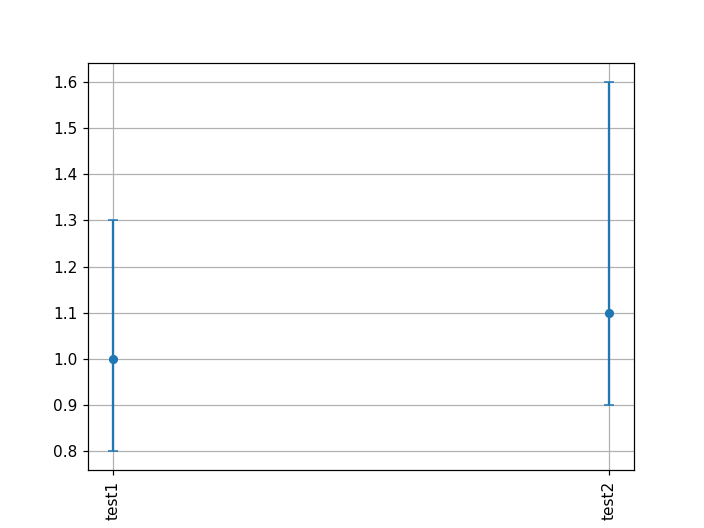

In [23]:
x=[0,1]
my_xticks = ["test1","test2"]
stock = np.array([[1,0.2,0.3],[1.1,0.2,0.5]])
print(stock)
plt.figure()
plt.grid()
plt.xticks(x,my_xticks,rotation=90)
plt.errorbar(x,stock[:,0],yerr=stock[:,1:3].T,markersize=5,capsize=3,fmt='o')
# plt.ylabel(hp)
# plt.title("%s_%s"%(hp,t))
plt.show()

In [71]:
rv_data = np.loadtxt("rv_betapic_carine.txt",usecols=(0,1,2))
rv_time = rv_data[:,0]
index = np.argwhere(rv_time>=3333)
rv_time = np.ndarray.flatten(rv_time[index])

RV_18_19_single = np.loadtxt("res_TESS_18_19_RV_single_obs.txt",usecols=(0,1,6,13,14),skiprows=1)
RV_20_21_0_single = np.loadtxt("res_TESS_20_21_0_RV_single_obs.txt",usecols=(0,1,6,13,14),skiprows=1)
RV_20_21_1_single = np.loadtxt("res_TESS_20_21_1_RV_single_obs.txt",usecols=(0,1,6,13,14),skiprows=1)
RV_20_21_2_single = np.loadtxt("res_TESS_20_21_2_RV_single_obs.txt",usecols=(0,1,6,13,14),skiprows=1)

RV_18_19_single_moy = np.loadtxt("res_TESS_18_19_RV_groups_moy_single_obs.txt",usecols=(0,1,6,13,14),skiprows=1)
RV_20_21_0_single_moy = np.loadtxt("res_TESS_20_21_0_RV_groups_moy_single_obs.txt",usecols=(0,1,6,13,14),skiprows=1)
RV_20_21_1_single_moy = np.loadtxt("res_TESS_20_21_1_RV_groups_moy_single_obs.txt",usecols=(0,1,6,13,14),skiprows=1)
RV_20_21_2_single_moy = np.loadtxt("res_TESS_20_21_2_RV_groups_moy_single_obs.txt",usecols=(0,1,6,13,14),skiprows=1)

RV_18_19_grp = np.loadtxt("res_TESS_18_19_RV_groups_obs.txt",usecols=(0,1,6,13,14),skiprows=1)
RV_20_21_0_grp = np.loadtxt("res_TESS_20_21_0_RV_groups_obs.txt",usecols=(0,1,6,13,14),skiprows=1)
RV_20_21_1_grp = np.loadtxt("res_TESS_20_21_1_RV_groups_obs.txt",usecols=(0,1,6,13,14),skiprows=1)
RV_20_21_2_grp = np.loadtxt("res_TESS_20_21_2_RV_groups_obs.txt",usecols=(0,1,6,13,14),skiprows=1)

x = [0,1,2,3]
my_xticks = ['18_19','20_21_0','20_21_1','20_21_2']


plt.xticks(x,my_xticks)
for i in range(len(RV_18_19_single)) :
# for i in range(5):
    plt.figure()
    plt.grid()
    plt.xticks(x,my_xticks,rotation=20)
    
    plt.errorbar(x[0],RV_18_19_single[i,2]*1000,yerr=np.reshape(np.array([RV_18_19_single[i,3]*1000,RV_18_19_single[i,4]*1000]),(2,1)),markersize=8,capsize=0,fmt=".k",label="Offset = %.3f / - = %.3f / + = %.3f"%(RV_18_19_single[i,2]*1000,RV_18_19_single[i,3]*1000,RV_18_19_single[i,4]*1000))
    plt.errorbar(x[1],RV_20_21_0_single[i,2]*1000,yerr=np.reshape(np.array([RV_20_21_0_single[i,3]*1000,RV_20_21_0_single[i,4]*1000]),(2,1)),markersize=8,capsize=0,fmt=".b",label="Offset = %.3f / - = %.3f / + = %.3f"%(RV_20_21_0_single[i,2]*1000,RV_20_21_0_single[i,3]*1000,RV_20_21_0_single[i,4]*1000))
    plt.errorbar(x[2],RV_20_21_1_single[i,2]*1000,yerr=np.reshape(np.array([RV_20_21_1_single[i,3]*1000,RV_20_21_1_single[i,4]*1000]),(2,1)),markersize=8,capsize=0,fmt=".r",label="Offset = %.3f / - = %.3f / + = %.3f"%(RV_20_21_1_single[i,2]*1000,RV_20_21_1_single[i,3]*1000,RV_20_21_1_single[i,4]*1000))
    plt.errorbar(x[3],RV_20_21_2_single[i,2]*1000,yerr=np.reshape(np.array([RV_20_21_2_single[i,3]*1000,RV_20_21_2_single[i,4]*1000]),(2,1)),markersize=8,capsize=0,fmt=".m",label="Offset = %.3f / - = %.3f / + = %.3f"%(RV_20_21_2_single[i,2]*1000,RV_20_21_2_single[i,3]*1000,RV_20_21_2_single[i,4]*1000))
    
    plt.legend(bbox_to_anchor=(1.,1.),loc='upper left')
    plt.title("Comparaison_Offsets_obs_%i_%i"%(RV_18_19_single[i,0],RV_18_19_single[i,1]))
    plt.savefig(dir+"obs/Comparaison_Offsets_obs_%i_%i.pdf"%(RV_18_19_single[i,0],RV_18_19_single[i,1]),bbox_inches='tight')
    plt.close()

    
my_xticks = ['18_19_moy','18_19_grp','20_21_0_moy','20_21_0_grp','20_21_1_moy','20_21_1_grp','20_21_2_moy','20_21_2_grp']
x = [0,1,2,3,4,5,6,7]


for j in range(len(RV_18_19_grp)) :
# for j in range(1):
    plt.figure(figsize=(9,3))
    plt.grid()
    plt.xticks(x,my_xticks,rotation=20)
    plt.errorbar(x[0],RV_18_19_single_moy[j,2]*1000,yerr=np.reshape(np.array([RV_18_19_single_moy[j,3]*1000,RV_18_19_single_moy[j,4]*1000]),(2,1)),markersize=8,capsize=0,fmt=".k",label="Offset = %.3f / - = %.3f / + = %.3f"%(RV_18_19_single_moy[j,2]*1000,RV_18_19_single_moy[j,3]*1000,RV_18_19_single_moy[j,4]*1000))
    plt.errorbar(x[1],RV_18_19_grp[j,2]*1000,yerr=np.reshape(np.array([RV_18_19_grp[j,3]*1000,RV_18_19_grp[j,4]*1000]),(2,1)),markersize=8,capsize=0,color="gray",marker='.',label="Offset = %.3f / - = %.3f / + = %.3f"%(RV_18_19_grp[j,2]*1000,RV_18_19_grp[j,3]*1000,RV_18_19_grp[j,4]*1000))
    
    plt.errorbar(x[2],RV_20_21_0_single_moy[j,2]*1000,yerr=np.reshape(np.array([RV_20_21_0_single_moy[j,3]*1000,RV_20_21_0_single_moy[j,4]*1000]),(2,1)),markersize=8,capsize=0,fmt=".b",label="Offset = %.3f / - = %.3f / + = %.3f"%(RV_20_21_0_single_moy[j,2]*1000,RV_20_21_0_single_moy[j,3]*1000,RV_20_21_0_single_moy[j,4]*1000))
    plt.errorbar(x[3],RV_20_21_0_grp[j,2]*1000,yerr=np.reshape(np.array([RV_20_21_0_grp[j,3]*1000,RV_20_21_0_grp[j,4]*1000]),(2,1)),markersize=8,capsize=0,color="royalblue",marker='.',label="Offset = %.3f / - = %.3f / + = %.3f"%(RV_20_21_0_grp[j,2]*1000,RV_20_21_0_grp[j,3]*1000,RV_20_21_0_grp[j,4]*1000))    
    
    plt.errorbar(x[4],RV_20_21_1_single_moy[j,2]*1000,yerr=np.reshape(np.array([RV_20_21_1_single_moy[j,3]*1000,RV_20_21_1_single_moy[j,4]*1000]),(2,1)),markersize=8,capsize=0,fmt=".r",label="Offset = %.3f / - = %.3f / + = %.3f"%(RV_20_21_1_single_moy[j,2]*1000,RV_20_21_1_single_moy[j,3]*1000,RV_20_21_1_single_moy[j,4]*1000))
    plt.errorbar(x[5],RV_20_21_1_grp[j,2]*1000,yerr=np.reshape(np.array([RV_20_21_1_grp[j,3]*1000,RV_20_21_1_grp[j,4]*1000]),(2,1)),markersize=8,capsize=0,color="orangered",marker='.',label="Offset = %.3f / - = %.3f / + = %.3f"%(RV_20_21_1_grp[j,2]*1000,RV_20_21_1_grp[j,3]*1000,RV_20_21_1_grp[j,4]*1000))
    
    plt.errorbar(x[6],RV_20_21_2_single_moy[j,2]*1000,yerr=np.reshape(np.array([RV_20_21_2_single_moy[j,3]*1000,RV_20_21_2_single_moy[j,4]*1000]),(2,1)),markersize=8,capsize=0,fmt=".m",label="Offset = %.3f / - = %.3f / + = %.3f"%(RV_20_21_2_single_moy[j,2]*1000,RV_20_21_2_single_moy[j,3]*1000,RV_20_21_2_single_moy[j,4]*1000))
    plt.errorbar(x[7],RV_20_21_2_grp[j,2]*1000,yerr=np.reshape(np.array([RV_20_21_2_grp[j,3]*1000,RV_20_21_2_grp[j,4]*1000]),(2,1)),markersize=8,capsize=0,color="deeppink",marker='.',label="Offset = %.3f / - = %.3f / + = %.3f"%(RV_20_21_2_grp[j,2]*1000,RV_20_21_2_grp[j,3]*1000,RV_20_21_2_grp[j,4]*1000))
   
    plt.legend(bbox_to_anchor=(1.,1.),loc='upper left')
    plt.title("Comparaison_Offsets_grps_%i_%i"%(RV_18_19_grp[j,0],RV_18_19_grp[j,1]))
    plt.savefig(dir+"grp/Comparaison_Offsets_grps_%i_%i.pdf"%(RV_18_19_grp[j,0],RV_18_19_grp[j,1]),bbox_inches='tight')
    plt.close()
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>